In [613]:
import numpy as np
import pandas as pd
import statistics as st
import random 
import csv

## Pandas

In [614]:
%%time
nba_df = pd.read_csv("all_seasons.csv")
nba_df.head()

CPU times: user 18.6 ms, sys: 5.53 ms, total: 24.2 ms
Wall time: 23.4 ms


,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [615]:
def csv_to_dict(file_name):
    
    # reading the csv and converting data into list of dictionaries (or songs)
    
    with open('{}'.format(file_name), 'r') as f:
        #creating reader object through object f
        reader = csv.reader(f) 
        #save the first row as the key values in dictionary and skip first row
        first_row = next(reader)
        #empty list to store our data
        data_list = []
        #creating a list of dictionaries. each song is a dictionary 
        for row in reader:
            data_list.append(dict(zip(first_row, row)))
 
    return data_list

In [616]:
nba_dict = csv_to_dict('all_seasons.csv')
nba_dict

[{'': '0',
  'player_name': 'Dennis Rodman',
  'team_abbreviation': 'CHI',
  'age': '36.0',
  'player_height': '198.12',
  'player_weight': '99.79024',
  'college': 'Southeastern Oklahoma State',
  'country': 'USA',
  'draft_year': '1986',
  'draft_round': '2',
  'draft_number': '27',
  'gp': '55',
  'pts': '5.7',
  'reb': '16.1',
  'ast': '3.1',
  'net_rating': '16.1',
  'oreb_pct': '0.18600000000000003',
  'dreb_pct': '0.32299999999999995',
  'usg_pct': '0.1',
  'ts_pct': '0.479',
  'ast_pct': '0.113',
  'season': '1996-97'},
 {'': '1',
  'player_name': 'Dwayne Schintzius',
  'team_abbreviation': 'LAC',
  'age': '28.0',
  'player_height': '215.9',
  'player_weight': '117.93392',
  'college': 'Florida',
  'country': 'USA',
  'draft_year': '1990',
  'draft_round': '1',
  'draft_number': '24',
  'gp': '15',
  'pts': '2.3',
  'reb': '1.5',
  'ast': '0.3',
  'net_rating': '12.3',
  'oreb_pct': '0.078',
  'dreb_pct': '0.151',
  'usg_pct': '0.175',
  'ts_pct': '0.43',
  'ast_pct': '0.048',


In [617]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12305 entries, 0 to 12304
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12305 non-null  int64  
 1   player_name        12305 non-null  object 
 2   team_abbreviation  12305 non-null  object 
 3   age                12305 non-null  float64
 4   player_height      12305 non-null  float64
 5   player_weight      12305 non-null  float64
 6   college            12305 non-null  object 
 7   country            12305 non-null  object 
 8   draft_year         12305 non-null  object 
 9   draft_round        12305 non-null  object 
 10  draft_number       12305 non-null  object 
 11  gp                 12305 non-null  int64  
 12  pts                12305 non-null  float64
 13  reb                12305 non-null  float64
 14  ast                12305 non-null  float64
 15  net_rating         12305 non-null  float64
 16  oreb_pct           123

In [618]:
nba_df.describe()

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000
mean,6152.000000,27.084518,200.611602,100.369926,51.290532,8.172775,3.559155,1.813986,-2.255733,0.054473,0.141014,0.184891,0.511060,0.131358
std,3552.291866,4.335868,9.146321,12.477150,25.095909,5.974957,2.483550,1.794155,12.673254,0.043599,0.062704,0.053390,0.101163,0.094483
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3076.000000,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.480000,0.066000
50%,6152.000000,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.041000,0.131000,0.181000,0.524000,0.103000
75%,9228.000000,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.217000,0.561000,0.178000
max,12304.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [619]:
nba_df.columns

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [620]:
nba_df.shape

(12305, 22)

Think of pandas dataframe as a dictionary of lists, with each list representing a column of the data. Dictionary of lists is more efficient than list of dictionaries.

Columns are represented by sries, which is array with extra mrethods and properties

In [621]:
type(nba_df['pts'])

# same as 

nba_df.pts

0         5.7
1         2.3
2         0.8
3         3.7
4         2.4
         ... 
12300     7.6
12301    10.8
12302    12.1
12303     1.1
12304     4.0
Name: pts, Length: 12305, dtype: float64

In [622]:
# many columns together are a subset 

player_team = nba_df[['player_name', 'team_abbreviation']]
player_team

,player_name,team_abbreviation
0,Dennis Rodman,CHI
1,Dwayne Schintzius,LAC
2,Earl Cureton,TOR
3,Ed O'Bannon,DAL
4,Ed Pinckney,MIA
...,...,...
12300,Markieff Morris,MIA
12301,Markelle Fultz,ORL
12302,Marcus Smart,BOS
12303,Marcus Garrett,MIA


In [623]:
#grabbing the name of the 250th player 

nba_df['player_name'][250]

'Randolph Childress'

In [624]:
# We can also use .at method to retrieve at specific row and column [r,c]

nba_df.at[250, 'player_name']

'Randolph Childress'

In [625]:
 # for random row or nba player
    
nba_df.loc[random.randint(0,len(nba_df.player_name))]


Unnamed: 0                      11959
player_name          DeMarcus Cousins
team_abbreviation                 DEN
age                              31.0
player_height                  208.28
player_weight               122.46984
college                      Kentucky
country                           USA
draft_year                       2010
draft_round                         1
draft_number                        5
gp                                 48
pts                               9.0
reb                               5.6
ast                               1.5
net_rating                        2.2
oreb_pct                        0.103
dreb_pct                        0.281
usg_pct                         0.267
ts_pct                          0.567
ast_pct                         0.153
season                        2021-22
Name: 11959, dtype: object

In [626]:
# first valid index within a column (first non null value)

#this tells us the row where the data is legit 

nba_df.player_name.first_valid_index()

0

In [627]:
#for rows 50 through 100
nba_df.loc[50:150]

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
50,50,Donyell Marshall,GSW,24.0,205.74,104.326160,Connecticut,USA,1994,1,...,7.3,4.5,0.9,-8.6,0.098,0.210,0.222,0.478,0.088,1996-97
51,51,Doug Christie,TOR,27.0,198.12,92.986360,Pepperdine,USA,1992,1,...,14.5,5.3,3.9,-2.6,0.031,0.135,0.184,0.543,0.165,1996-97
52,52,Dikembe Mutombo,ATL,31.0,218.44,113.398000,Georgetown,Congo,1991,1,...,13.3,11.6,1.4,8.1,0.112,0.256,0.179,0.584,0.066,1996-97
53,53,Dell Curry,CHH,33.0,195.58,92.986360,Virginia Tech,USA,1986,1,...,14.8,3.1,1.7,1.6,0.024,0.098,0.226,0.562,0.104,1996-97
54,54,Felton Spencer,GSW,29.0,213.36,127.005760,Louisville,USA,1990,1,...,5.1,5.7,0.3,-1.2,0.124,0.205,0.128,0.524,0.020,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,146,Allan Houston,NYK,26.0,198.12,90.718400,Tennessee,USA,1993,1,...,14.8,3.0,2.2,2.9,0.020,0.086,0.223,0.531,0.117,1996-97
147,147,Allen Iverson,PHI,22.0,182.88,74.842680,Georgetown,USA,1996,1,...,23.5,4.1,7.5,-7.0,0.040,0.072,0.284,0.513,0.320,1996-97
148,148,Alonzo Mourning,MIA,27.0,208.28,118.387512,Georgetown,USA,1992,1,...,19.8,9.9,1.6,10.5,0.100,0.229,0.275,0.578,0.086,1996-97
149,149,Brooks Thompson,DEN,26.0,193.04,87.543256,Oklahoma State,USA,1994,1,...,6.6,1.4,2.7,-6.2,0.019,0.087,0.214,0.526,0.277,1996-97


In [628]:
#random sample of rows 
nba_df.sample(10)

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
253,253,Rasheed Wallace,POR,22.0,210.82,102.058200,North Carolina,USA,1995,1,...,15.1,6.8,1.2,7.8,0.079,0.181,0.218,0.588,0.067,1996-97
6226,6226,Dominique Jones,DAL,22.0,195.58,97.522280,South Florida,USA,2010,1,...,2.3,1.4,1.1,-8.7,0.052,0.165,0.222,0.400,0.241,2010-11
8524,8524,Andrew Bogut,GSW,30.0,213.36,117.933920,Utah,Australia,2005,1,...,6.3,8.1,2.7,16.6,0.101,0.262,0.133,0.565,0.149,2014-15
5217,5217,Javaris Crittenton,MEM,20.0,195.58,90.718400,Georgia Tech,USA,2007,1,...,5.6,2.2,1.0,-2.5,0.043,0.131,0.216,0.499,0.121,2007-08
6438,6438,Samardo Samuels,CLE,22.0,205.74,117.933920,Louisville,Jamaica,Undrafted,Undrafted,...,7.8,4.3,0.5,-10.9,0.116,0.147,0.214,0.498,0.043,2010-11
8080,8080,Omri Casspi,HOU,26.0,205.74,102.058200,None,Israel,2009,1,...,6.9,3.7,1.2,6.2,0.050,0.165,0.181,0.528,0.105,2013-14
7459,7459,Jason Richardson,PHI,32.0,198.12,102.058200,Michigan State,USA,2001,1,...,10.5,3.8,1.5,0.3,0.022,0.140,0.187,0.495,0.081,2012-13
3659,3659,Al Jefferson,BOS,20.0,208.28,120.201880,None,USA,2004,1,...,6.7,4.4,0.3,-1.7,0.137,0.205,0.212,0.554,0.042,2004-05
3536,3536,Willie Green,PHI,23.0,187.96,91.171992,Detroit Mercy,USA,2003,2,...,7.7,2.3,1.8,-5.8,0.022,0.120,0.231,0.457,0.172,2004-05
7152,7152,Lazar Hayward,OKC,25.0,198.12,102.058200,Marquette,USA,2010,1,...,1.4,0.6,0.2,-17.1,0.017,0.102,0.183,0.427,0.054,2011-12


In [629]:
%%time

#Now that we have a feel for the data, let's start doing some analysis

print("The mean ppg for an NBA player all time is {}".format(st.mean(nba_df.pts)))
print("The most popular age of an NBA player is {}".format(st.mode(nba_df.age)))
print("The average age of an NBA player is {}".format(st.mean(nba_df.age)))

The mean ppg for an NBA player all time is 8.172775294595693
The most popular age of an NBA player is 24.0
The average age of an NBA player is 27.08451848841934
CPU times: user 9.48 ms, sys: 150 µs, total: 9.63 ms
Wall time: 9.61 ms


In [630]:
#take a subset of the data where the pts are greater than 20

#this is taking the rows wehere the condition inside brackets is true

topscorers = nba_df[nba_df.pts > 20][['player_name', 'pts', 'college', 'season']]

print('There are {} players in NBA history who scored more than 20 points'. format(len(topscorers.pts)))

There are 646 players in NBA history who scored more than 20 points


In [631]:
# we want to view all 646, so we set max to 1000. 

from IPython.display import display 
with pd.option_context('display.max_rows', 1000):
    display(topscorers)
    

,player_name,pts,college,season
85,Gary Payton,21.8,Oregon State,1996-97
93,Glen Rice,26.8,Michigan,1996-97
95,Glenn Robinson,21.1,Purdue,1996-97
104,Hakeem Olajuwon,23.2,Houston,1996-97
107,Grant Hill,21.4,Duke,1996-97
147,Allen Iverson,23.5,Georgetown,1996-97
153,Anfernee Hardaway,20.5,Memphis,1996-97
176,Damon Stoudamire,20.2,Arizona,1996-97
217,Chris Webber,20.1,Michigan,1996-97
221,Jerry Stackhouse,20.7,North Carolina,1996-97


In [632]:
UCLA_stars = topscorers[topscorers.college == "UCLA"][['player_name', 'college', 'pts', 'season']]
UCLA_stars

,player_name,college,pts,season
258,Reggie Miller,UCLA,21.6,1996-97
3393,Baron Davis,UCLA,22.9,2003-04
4876,Baron Davis,UCLA,20.1,2006-07
5005,Baron Davis,UCLA,21.8,2007-08
6287,Russell Westbrook,UCLA,21.9,2010-11
6462,Kevin Love,UCLA,20.2,2010-11
6906,Russell Westbrook,UCLA,23.6,2011-12
7138,Kevin Love,UCLA,26.0,2011-12
7166,Russell Westbrook,UCLA,23.2,2012-13
7806,Russell Westbrook,UCLA,21.8,2013-14


In [633]:
#All time leading scorers in NBA sorted from most points to least points

scorers_top20 = nba_df.sort_values('pts', ascending = False).head(20)[['player_name', 'team_abbreviation', 'pts','reb','ast', 'season']]
scorers_top20

,player_name,team_abbreviation,pts,reb,ast,season
10572,James Harden,HOU,36.1,6.6,7.5,2018-19
4342,Kobe Bryant,LAL,35.4,5.3,4.5,2005-06
11041,James Harden,HOU,34.3,6.6,7.5,2019-20
4124,Allen Iverson,PHI,33.0,3.2,7.4,2005-06
2953,Tracy McGrady,ORL,32.1,6.5,5.5,2002-03
7928,Kevin Durant,OKC,32.0,7.4,5.5,2013-14
11335,Stephen Curry,GSW,32.0,5.5,5.8,2020-21
4703,Kobe Bryant,LAL,31.6,5.7,5.4,2006-07
9143,Russell Westbrook,OKC,31.6,10.7,10.4,2016-17
4323,LeBron James,CLE,31.4,7.0,6.6,2005-06


In [634]:
deca_df = pd.read_csv("deca.csv")

deca_df['Timestamp'] = pd.to_datetime(deca_df.Timestamp)

# Extracting specific parts of the date
deca_df['Day'] = pd.DatetimeIndex(deca_df.Timestamp).day
deca_df['Month'] = pd.DatetimeIndex(deca_df.Timestamp).month
deca_df['Year'] = pd.DatetimeIndex(deca_df.Timestamp).year

deca_sept_8 = deca_df[deca_df.Day == 8]

deca_sept_8[['First Name', 'Current Grade', 'Year in Irvington DECA', 'Month', 'Day', 'Year', 'Timestamp']]

,First Name,Current Grade,Year in Irvington DECA,Month,Day,Year,Timestamp
210,Prabhav,11,2.0,9,8,2021,2021-09-08 00:02:06
211,Rishi,12,4.0,9,8,2021,2021-09-08 10:22:58
212,Jasmeh,9,NaN,9,8,2021,2021-09-08 11:14:03
213,Pranay,11,3.0,9,8,2021,2021-09-08 11:45:46
214,madhurum,10,1.0,9,8,2021,2021-09-08 12:34:51
215,Harsheel,12,3.0,9,8,2021,2021-09-08 13:00:52
216,Ridhi,9,2.0,9,8,2021,2021-09-08 14:19:11
217,Anushka,12,4.0,9,8,2021,2021-09-08 16:12:29
218,Kushaagra,11,3.0,9,8,2021,2021-09-08 16:29:43
219,Sabella,9,1.0,9,8,2021,2021-09-08 17:04:02


#### Grouping and Aggregating Data in Python

We are aggregating DECA data by frosh, soph, junior, or senior

In [635]:
age_groups = deca_df.groupby('Current Grade')

# mean years of DECA experience among different high school age groups

age_groups["Year in Irvington DECA"].mean()

Current Grade
9     1.017241
10    1.400000
11    2.379310
12    3.019608
Name: Year in Irvington DECA, dtype: float64

<Axes: xlabel='player_name'>

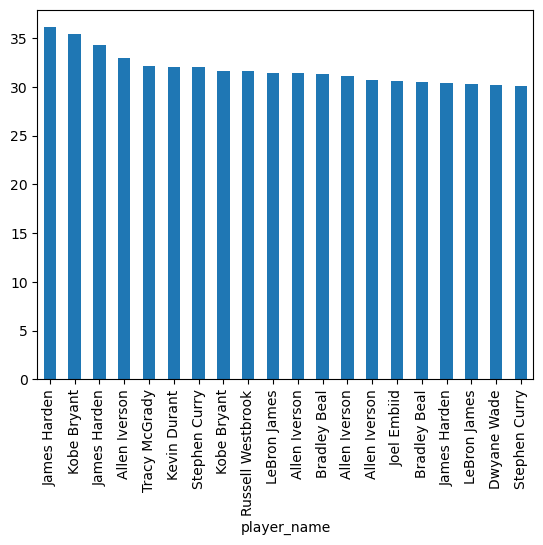

In [636]:
#set name as the primary index (default leftmost column)

scorers_top20.set_index('player_name', inplace = True)

#simple bar graph in Pandas
scorers_top20.pts.plot(kind="bar")

In [637]:
scorers_top20

,team_abbreviation,pts,reb,ast,season
player_name,,,,,
James Harden,HOU,36.1,6.6,7.5,2018-19
Kobe Bryant,LAL,35.4,5.3,4.5,2005-06
James Harden,HOU,34.3,6.6,7.5,2019-20
Allen Iverson,PHI,33.0,3.2,7.4,2005-06
Tracy McGrady,ORL,32.1,6.5,5.5,2002-03
Kevin Durant,OKC,32.0,7.4,5.5,2013-14
Stephen Curry,GSW,32.0,5.5,5.8,2020-21
Kobe Bryant,LAL,31.6,5.7,5.4,2006-07
Russell Westbrook,OKC,31.6,10.7,10.4,2016-17


# Matplotlib and Seaborn

In [657]:
import matplotlib.pyplot as plt
import seaborn as sns

#tells jupyter to display graphs in juptyer notebook rather than as pop ups
%matplotlib inline

In [662]:
#Basic Line chart 

years = [2010, 2011, 2012, 2013, 2014, 2015]
yield_apples = [0.895, 0.91, 0.919, 0.926, 0.929, 0.931]
yield_oranges = [0.96,0.92,0.9,0.85,0.84,0.83]

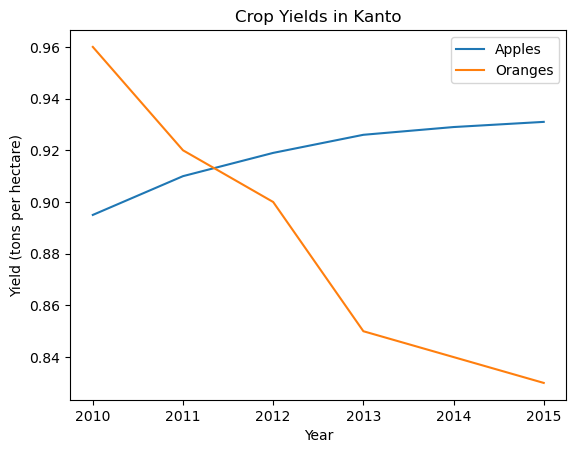

In [667]:
#always use a semicolon to avoid output
plt.plot(years, yield_apples);
plt.plot(years, yield_oranges);

plt.xlabel('Year');
plt.ylabel('Yield (tons per hectare)');

plt.title('Crop Yields in Kanto');
plt.legend(['Apples', 'Oranges']);